# Temperature comparison: Hercules vs. Honeybear

This is a Jupyter notebook that employs Python libraries in the analysis of temperature data from the CTD instrument on Hercules, and compares it to the temperature data collected by 'Honeybear', a open source datalogger device constructed onboard the Nautilus during expedition NA075.  

To use the below notebook, select each cell by clicking on it, and then Shift+Enter.  It is important to do this in sequence from top to bottom initially, as some cells depend on variables created / modified 'above' them.

Visit [here](http://jupyter.org) for more information on using and installing Jupyter.


## Load libraries; change directory

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

import matplotlib

import pandas as pd

import dateutil.parser

from io import StringIO

import os

In [2]:
os.chdir('data')
#os.chdir('raw_honeybear')
!ls

H1547.CTD.sampled.tsv		   v_bear_cast4_voltage.txt
td_bear_cast1_temppress_H1547.txt


## Initial plots of data

<IPython.core.display.Javascript object>


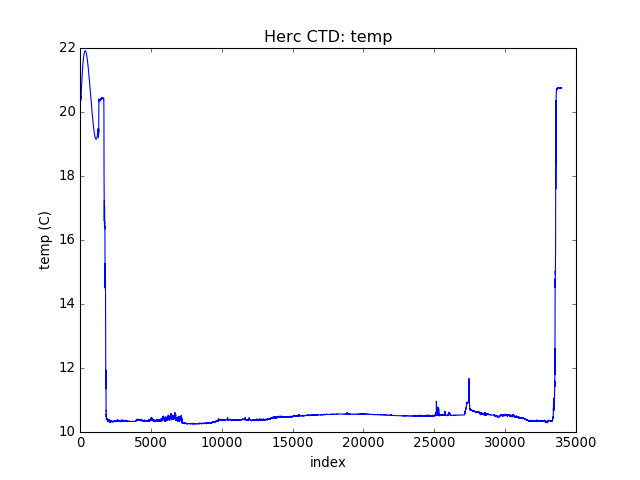

In [12]:
log=pd.read_csv('H1547.CTD.sampled.tsv',delimiter='\t',names=['date','temp','a','b','c','d','e','f'])

y_ctd=log.temp.tolist()

fig_ctd,ax_ctd=plt.subplots()
ax_ctd.plot(y_ctd)

ax_ctd.set_title('Herc CTD: temp')
ax_ctd.set_xlabel('index')
ax_ctd.set_ylabel('temp (C)')


<IPython.core.display.Javascript object>


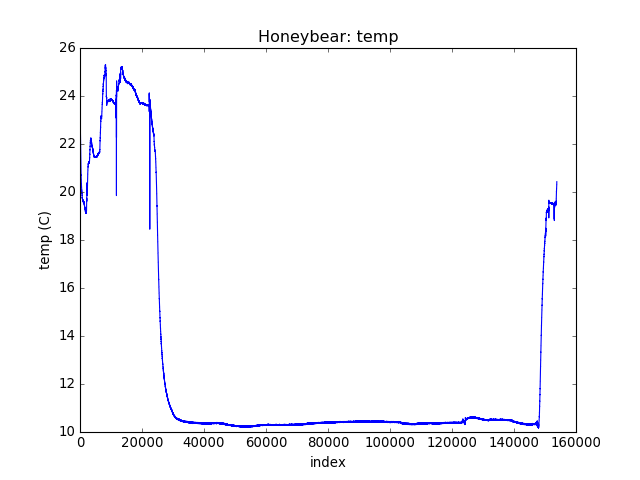

In [13]:
bear=pd.read_csv('td_bear_cast1_temppress_H1547.txt',delimiter=' ',names=['time','pressure','temp'])

y_bear=bear.temp.tolist()

fig_bear,ax_bear=plt.subplots()
ax_bear.plot(y_bear)

ax_bear.set_title('Honeybear: temp')
ax_bear.set_xlabel('index')
ax_bear.set_ylabel('temp (C)')

## Match indices by lining up events

First, try to determine the time / index at which Herc went into the water ...

<IPython.core.display.Javascript object>


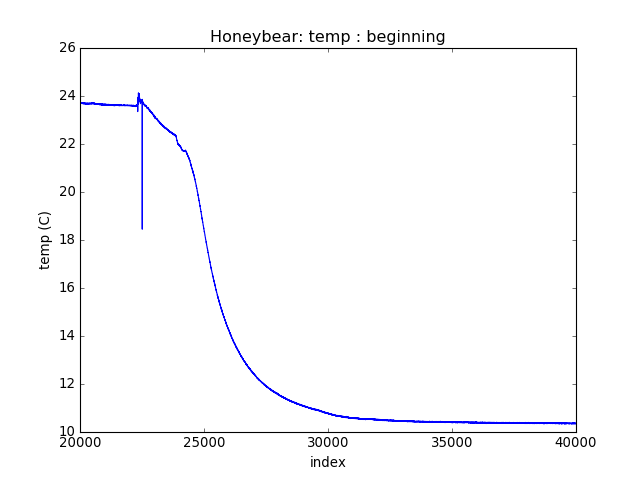

In [14]:
fig_bear_begin,ax_bear_begin=plt.subplots()
ax_bear_begin.plot(y_bear)
ax_bear_begin.set_xlim([20000,40000])
ax_bear_begin.set_title('Honeybear: temp : beginning')
ax_bear_begin.set_xlabel('index')
ax_bear_begin.set_ylabel('temp (C)')

Rough guess -- looks like Herc went into water around index= 24000

In [26]:
bear_begin=24290

<IPython.core.display.Javascript object>


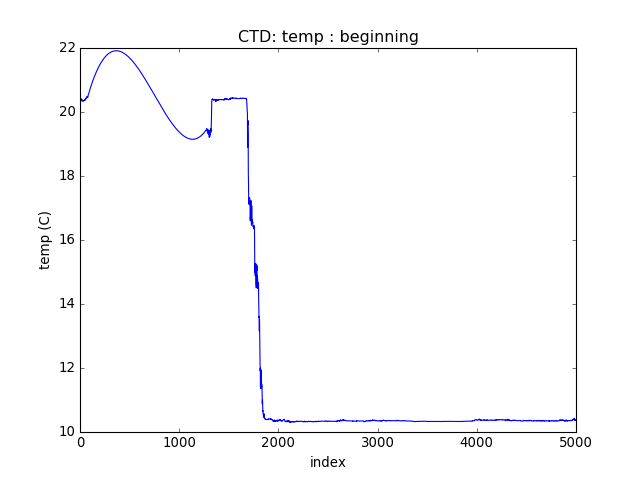

In [15]:
fig_ctd_begin,ax_ctd_begin=plt.subplots()
ax_ctd_begin.plot(y_ctd)
ax_ctd_begin.set_xlim([0,5000])
ax_ctd_begin.set_title('CTD: temp : beginning')
ax_ctd_begin.set_xlabel('index')
ax_ctd_begin.set_ylabel('temp (C)')

CTD data seems to indicate that Herc went into water around index=1700 ... 

In [27]:
ctd_begin=1680

Now try to match up 'out of the water' events ...

<IPython.core.display.Javascript object>


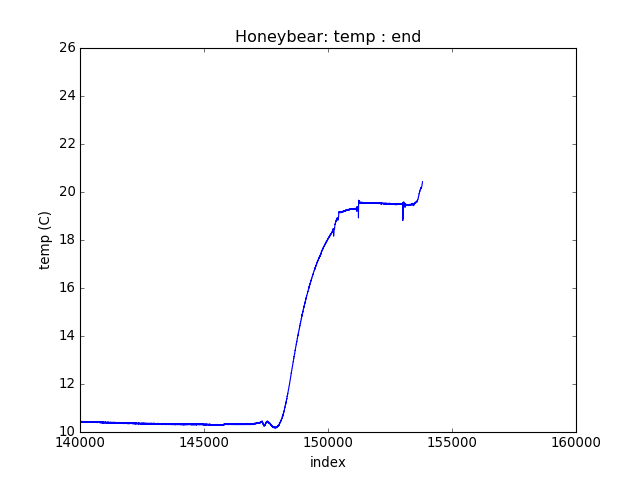

In [17]:
fig_bear_end,ax_bear_end=plt.subplots()
ax_bear_end.plot(y_bear)
ax_bear_end.set_xlim([1.4E5,1.6E5])
ax_bear_end.set_title('Honeybear: temp : end')
ax_bear_end.set_xlabel('index')
ax_bear_end.set_ylabel('temp (C)')

In [18]:
#bear_end=150300
bear_end=147920

<IPython.core.display.Javascript object>


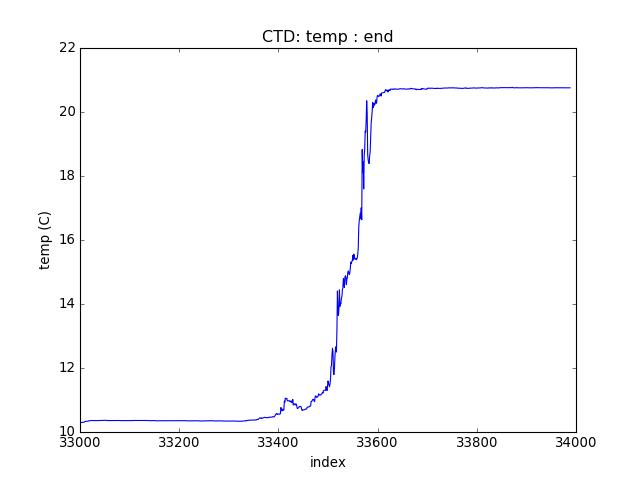

In [19]:
fig_ctd_end,ax_ctd_end=plt.subplots()
ax_ctd_end.plot(y_ctd)
ax_ctd_end.set_xlim([33000,34000])
ax_ctd_end.set_title('CTD: temp : end')
ax_ctd_end.set_xlabel('index')
ax_ctd_end.set_ylabel('temp (C)')

In [20]:
#ctd_end=33593
ctd_end=33454

Find factor 'm' by which to multiply one index in order to 'stretch' datasets to line up on top of one another ...

In [21]:
m=(ctd_end-ctd_begin)/(bear_end-bear_begin)
m

0.25700881663026776

Generate nbovel 'matched' indices for each dataset:

In [28]:
index=ctd_begin
ctd_index=[]
bear_index=[]

bear_sub=y_bear[bear_begin:bear_end]
ctd_sub=y_ctd[ctd_begin:ctd_end]

for i in range(0,len(bear_sub)):
    bear_index.append(i)

for i in range(0,len(ctd_sub)):
    ctd_index.append(i/m)
    

## Plot overlays ...

<IPython.core.display.Javascript object>


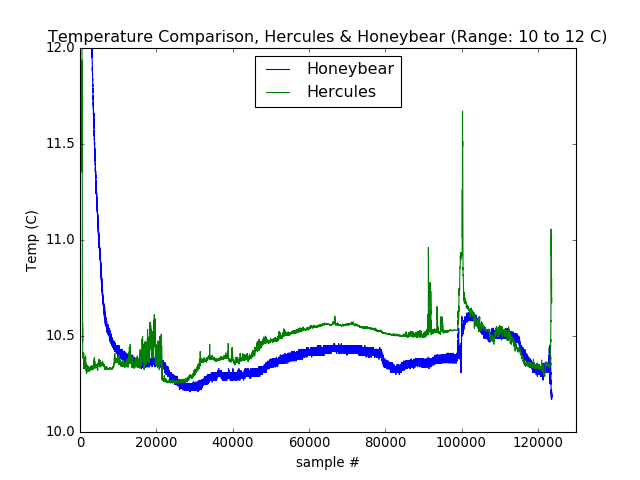

In [23]:
fig_overlay,ax_overlay=plt.subplots()
ax_overlay.plot(bear_index,bear_sub,label="Honeybear")
ax_overlay.plot(ctd_index,ctd_sub,label="Hercules")
ax_overlay.set_ylim([10,12])
ax_overlay.set_title('Temperature Comparison, Hercules & Honeybear (Range: 10 to 12 C)')
ax_overlay.set_xlabel('sample #')
ax_overlay.set_ylabel('Temp (C)')
ax_overlay.legend(loc="upper center")
ax_overlay.set_xlim(0,130000)
matplotlib.rcParams['figure.figsize'] = (11.,6.)

<IPython.core.display.Javascript object>


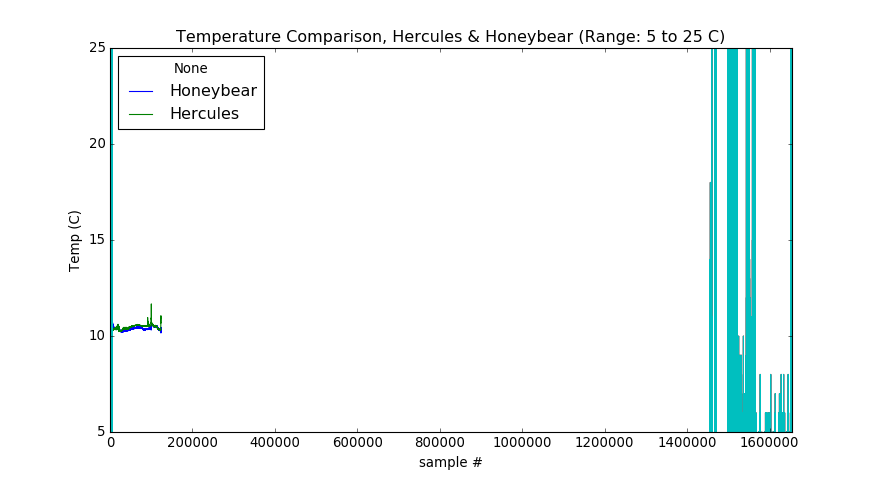

In [24]:
fig_overlay,ax_overlay=plt.subplots()
ax_overlay.plot(bear_index,bear_sub,label="Honeybear")
ax_overlay.plot(ctd_index,ctd_sub,label="Hercules")
ax_overlay.set_ylim([5,25])
ax_overlay.set_title('Temperature Comparison, Hercules & Honeybear (Range: 5 to 25 C)')
ax_overlay.set_xlabel('sample #')
ax_overlay.set_ylabel('Temp (C)')
ax_overlay.legend(loc="upper center")
ax_overlay.set_xlim(0,130000)
matplotlib.rcParams['figure.figsize'] = (11.,6.)

# Accelerometer data

In [29]:
!ls

H1547.CTD.sampled.tsv	td_bear_cast1_temppress_H1547.txt
a_bear_cast2_accel.txt	v_bear_cast4_voltage.txt


<IPython.core.display.Javascript object>


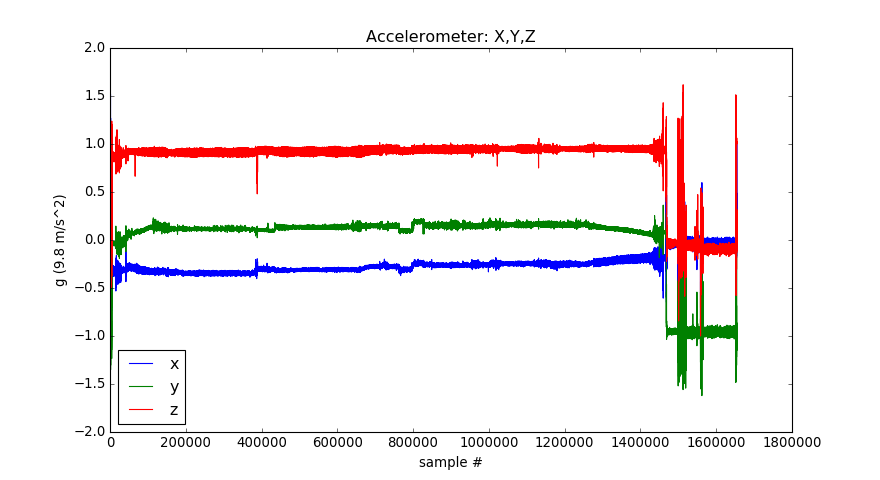

In [56]:
#log=pd.read_csv('a_bear_cast2_accel.txt',delimiter='\t',names=['date','temp','a','b','c','d','e','f'])
acc=pd.read_csv('a_bear_cast2_accel.txt',delimiter=' ',names=['time','x','y','z'])
fig_acc,ax_acc=plt.subplots()

f=4/1024. # factor to convert to g
x=acc.x.as_matrix()*f
y=acc.y.as_matrix()*f
z=acc.z.as_matrix()*f
ax_acc.plot(x,label='x')
ax_acc.plot(y,label='y')
ax_acc.plot(z,label='z')
ax_acc.legend(loc='lower left')
#ax_acc.set_xlim(200000,1400000)
#ax_acc.set_ylim(-200,300)
ax_acc.set_title('Accelerometer: X,Y,Z')
ax_acc.set_ylabel('g (9.8 m/s^2)')
ax_acc.set_xlabel('sample #')

<IPython.core.display.Javascript object>


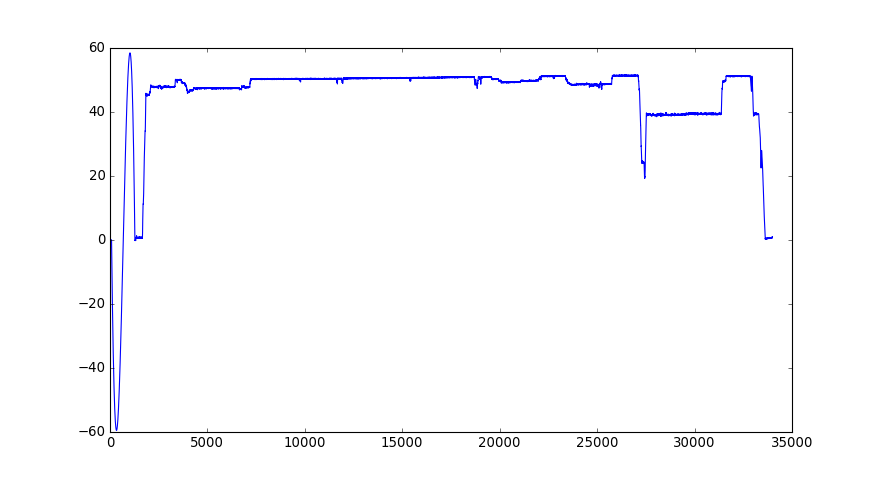

In [63]:
# Depth readings ... for comparison ...

log_ctd=pd.read_csv('H1547.CTD.sampled.tsv',delimiter='\t',names=['date','temp','a','b','c','d'])
fig_depth,ax_depth=plt.subplots()
ax_depth.plot(log_ctd.b)
#ax_depth.set_ylim(3.5,5)

# maybe the proper file is H1548 ... that might be the right accelerometer dive ?



# Voltage measurements

<IPython.core.display.Javascript object>


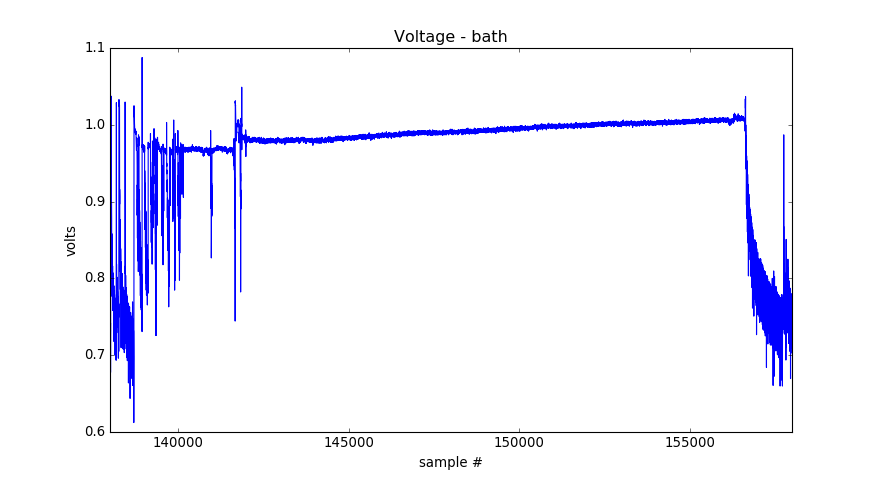

In [99]:
#log=pd.read_csv('a_bear_cast2_accel.txt',delimiter='\t',names=['date','temp','a','b','c','d','e','f'])
v=pd.read_csv('v_bear_cast4_voltage.txt',delimiter=' ',names=['time','v'])

fig_v,ax_v=plt.subplots()

volts=v.v.as_matrix()*3.3/4096
ax_v.plot(volts,label='volts')
#ax_acc.legend(loc='lower left')
#ax_v.set_xlim(135000,240000)
ax_v.set_xlim(138000,158000)
ax_v.set_ylim(.6,1.1)
ax_v.set_title('Voltage - bath')
ax_v.set_ylabel('volts')
ax_v.set_xlabel('sample #')

<IPython.core.display.Javascript object>


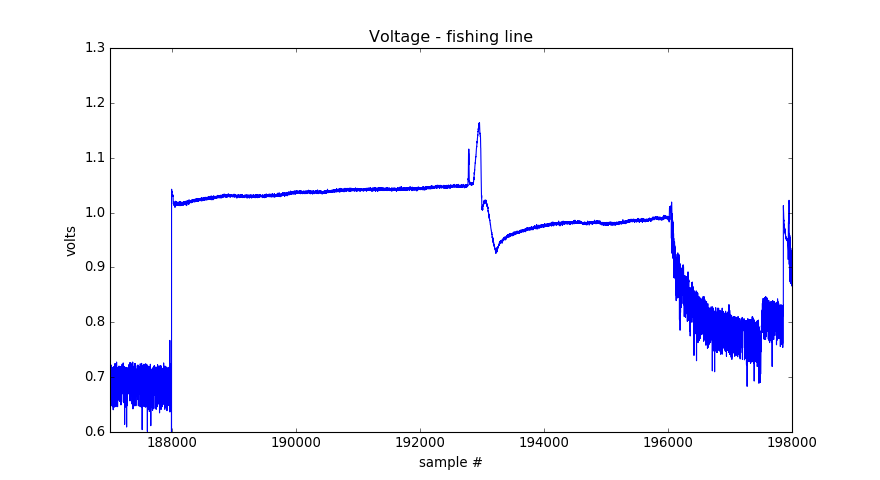

In [97]:
#log=pd.read_csv('a_bear_cast2_accel.txt',delimiter='\t',names=['date','temp','a','b','c','d','e','f'])
v=pd.read_csv('v_bear_cast4_voltage.txt',delimiter=' ',names=['time','v'])

fig_v,ax_v2=plt.subplots()

volts=v.v.as_matrix()*3.3/4096
ax_v2.plot(volts,label='volts')
#ax_acc.legend(loc='lower left')
ax_v2.set_xlim(187000,198000)
#ax_v2.set_xlim(138000,158000)
ax_v2.set_ylim(.6,1.3)
ax_v2.set_title('Voltage - fishing line')
ax_v2.set_ylabel('volts')
ax_v2.set_xlabel('sample #')